<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DR-for-full-water-wave-problem." data-toc-modified-id="DR-for-full-water-wave-problem.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DR for full water wave problem.</a></span></li></ul></div>

In [1]:
import numpy as np
from scipy import linalg as la
from scipy import sparse

import time
from numpy import linalg as LA

from numpy import cos, sin, exp, pi
from matplotlib import pyplot as plt
%matplotlib inline

In this notebook, we investigate various dispersion relations (DR).

### DR for full water wave problem.
Consider the following dispersion relation:
$$
\omega^2 = gk \tanh(kh).
$$
We let $g = 1, h = 1.$

In [50]:
g=1
h=1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


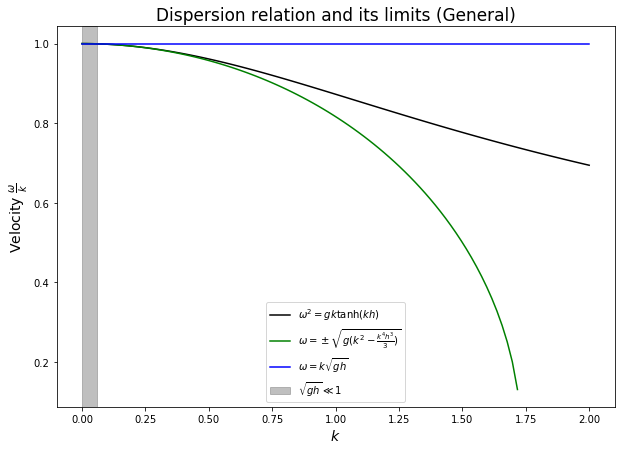

In [112]:
xvals = np.linspace(0.0001,2,100)
plt.figure(figsize=(10,7))
plt.plot(xvals, np.sqrt(xvals*np.tanh(xvals))/xvals, c = 'k')
plt.plot(xvals, np.sqrt((xvals**2 - (xvals**4)/3))/xvals, c = 'g')
plt.plot(xvals, xvals/xvals, c ='b')

plt.title('Dispersion relation and its limits (General)', fontsize=17)
plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'Velocity $\frac{\omega}{k}$', fontsize=14)
plt.axvspan(0, 0.06, color='grey', alpha=0.5)
plt.legend([r'$\omega^2 = gk \tanh(kh)$', r'$\omega = \pm\sqrt{g(k^2-\frac{k^4 h^3}{3})}$', r'$\omega = k\sqrt{gh}$', r'$\sqrt{gh} \ll 1$'])

plt.savefig('dispersion1.pdf')

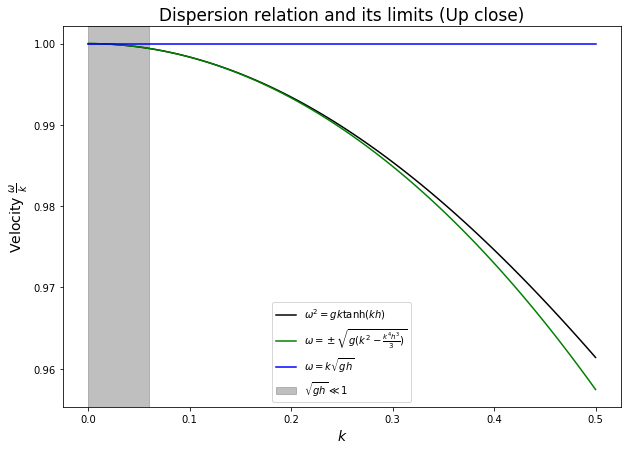

In [111]:
xvals = np.linspace(0.0001,0.5,100)
plt.figure(figsize=(10,7))
plt.plot(xvals, np.sqrt(xvals*np.tanh(xvals))/xvals, c = 'k')
plt.plot(xvals, np.sqrt((xvals**2 - (xvals**4)/3))/xvals, c = 'g')
plt.plot(xvals, xvals/xvals, c ='b')

plt.title('Dispersion relation and its limits (Up close)', fontsize=17)
plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'Velocity $\frac{\omega}{k}$', fontsize=14)
plt.axvspan(0, 0.06, color='grey', alpha=0.5)
plt.legend([r'$\omega^2 = gk \tanh(kh)$', r'$\omega = \pm\sqrt{g(k^2-\frac{k^4 h^3}{3})}$', r'$\omega = k\sqrt{gh}$', r'$\sqrt{gh} \ll 1$'])

plt.savefig('dispersion2.pdf')

In [127]:
xvals = np.linspace(-10,10,100)

In [128]:
yvals = xvals

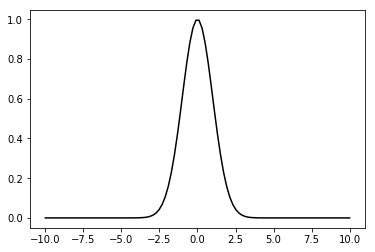

In [129]:
plt.plot(xvals, exp(-(xvals**2)/2), c = '0')

In [157]:
def FourierFit(x, f, N):
    L = np.max(x) - np.min(x)
    dx = x[1] - x[0]
    
    coeff = np.zeros(2*N+1, dtype = 'cfloat')
    for n in range(-N, N+1):
        integrand = np.exp(-2j*n*np.pi*x/L)*f(x)/L
        coeff[n] = dx*(np.sum(integrand) - integrand[0])
    
    return coeff

In [177]:
N= 1000
euler = lambda x: np.exp((-x**2)/2)
xvals = np.linspace(-pi, pi, N)

In [178]:
coeffs1 = FourierFit(xvals, euler, N)

In [190]:
def FourierVals(fHat, x):
    L = np.max(x) - np.min(x)
    N = (len(fHat)-1)//2
    fapprox = 0
    for k in range(-N, N+1):
        fapprox = fapprox + np.exp((2j)*k*np.pi*x/L)*fHat[k]
    return fapprox

In [201]:
x = xvals
t = 0
func = lambda k: np.exp(1j*(k*x + (1j)*k**2/4 + t*np.sqrt(k*np.tanh(k))))

In [202]:
fvals = FourierVals(coeffs1, xvals)

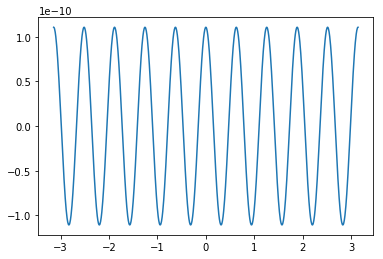

In [204]:
#plt.plot(xvals, fvals, c = "g")
plt.plot(xvals, 20*(func(10) + func(-10))/(2*np.sqrt(2*np.pi)))